1. RV: Log_Returns quadrieren und summieren
2. 70,15,15 (1,5 Jahre test set)
3. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

pd.options.mode.chained_assignment = None

In [3]:
!ls

RV_calculation.ipynb     RV_calculation_new.ipynb raw_data


In [507]:
ibm_df = pd.read_csv("raw_data/3Stocks/IBM_1min.csv")

In [3]:
ibm_df = pd.read_csv("raw_data/3Stocks/IBM_1min.csv")
jnj_df = pd.read_csv("raw_data/3Stocks/JNJ_1min.csv")
wmt_df = pd.read_csv("raw_data/3Stocks/WMT_1min.csv")

In [4]:
ibm_df['Date Time'] = pd.to_datetime(ibm_df['Date Time'])
jnj_df['Date Time'] = pd.to_datetime(jnj_df['Date Time'])
wmt_df['Date Time'] = pd.to_datetime(wmt_df['Date Time'])

In [5]:
ibm_df['Log_Returns'] = np.log(ibm_df['Close'] / ibm_df['Close'].shift(1))
jnj_df['Log_Returns'] = np.log(jnj_df['Close'] / jnj_df['Close'].shift(1))
wmt_df['Log_Returns'] = np.log(wmt_df['Close'] / wmt_df['Close'].shift(1))
ibm_df.dropna(inplace=True)
jnj_df.dropna(inplace=True)
wmt_df.dropna(inplace=True)

In [6]:
ibm_df = ibm_df.iloc[380:]
ibm_df.reset_index(drop=True, inplace=True)

In [404]:
ibm_df = ibm_df.iloc[380:]
ibm_df.reset_index(drop=True, inplace=True)

jnj_df = jnj_df.iloc[380:]
jnj_df.reset_index(drop=True, inplace=True)

wmt_df = wmt_df.iloc[380:]
wmt_df.reset_index(drop=True, inplace=True)

In [7]:
observations_per_day = ibm_df.groupby(ibm_df['Date Time'].dt.date).size()

In [8]:
trading_hours = observations_per_day.unique()
trading_hours

array([381])

In [9]:
ibm_df["log_return_squared"] = ibm_df["Log_Returns"].apply(lambda x: x**2)

In [10]:
ibm_df["realized_var"] = ibm_df["log_return_squared"].cumsum()

In [11]:
ibm_df["realized_vol"] = ibm_df["realized_var"].apply(lambda x: sqrt(x))

In [18]:
ibm_df

,Date Time,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol
0,2010-01-05 09:35:00,84.6767,84.8516,84.6767,84.7415,123004.0,2010-01-05,09:35:00,-0.012680,1.607932e-04,0.000161,0.012680
1,2010-01-05 09:36:00,84.7415,84.7544,84.6638,84.7318,101782.0,2010-01-05,09:36:00,-0.000114,1.310391e-08,0.000161,0.012681
2,2010-01-05 09:37:00,84.7415,84.7933,84.7221,84.7577,30386.0,2010-01-05,09:37:00,0.000306,9.340582e-08,0.000161,0.012685
3,2010-01-05 09:38:00,84.7544,84.7609,84.7091,84.7285,45357.0,2010-01-05,09:38:00,-0.000345,1.187291e-07,0.000161,0.012689
4,2010-01-05 09:39:00,84.7285,84.7285,84.6832,84.7026,37723.0,2010-01-05,09:39:00,-0.000306,9.347022e-08,0.000161,0.012693
...,...,...,...,...,...,...,...,...,...,...,...,...
958210,2019-12-31 15:51:00,114.7837,114.8095,114.7794,114.8095,20723.0,2019-12-31,15:51:00,0.000225,5.051046e-08,0.412063,0.641921
958211,2019-12-31 15:52:00,114.8095,114.8438,114.8052,114.8438,24968.0,2019-12-31,15:52:00,0.000299,8.922835e-08,0.412063,0.641921
958212,2019-12-31 15:53:00,114.8524,114.9038,114.8524,114.9038,39332.0,2019-12-31,15:53:00,0.000522,2.728102e-07,0.412063,0.641922
958213,2019-12-31 15:54:00,114.9038,114.9296,114.8910,114.9038,20436.0,2019-12-31,15:54:00,0.000000,0.000000e+00,0.412063,0.641922


In [394]:
ibm_df = ibm_df.iloc[380:]
ibm_df.reset_index(drop=True, inplace=True)

In [ ]:
380+381+381+381

2010-01-04: 9:36:00 - 15:55:00
2010-01-05: 9:35:00 - 15:55:00
2010-01-06: 9:35:00 - 15:55:00

In [219]:
ibm_df["mean_deviation"] = ibm_df["Log_Returns"].apply(lambda x: (x - log_return_mean)**2)

In [ ]:
70, 15

In [224]:
ibm_daily_volatility = (ibm_df.groupby(ibm_df['Date Time'].dt.date)["mean_deviation"].sum()/trading_hours)**0.5

In [454]:
len(ibm_df)

957835

In [462]:
cum_vol = np.zeros(len(ibm_df))

In [463]:
for index, row in ibm_df.iterrows():
    cum_vol[index] = (sqrt(row["mean_dev_cumsum"]/(index+1)))

In [444]:
ibm_df["mean_dev_cumsum"] = ibm_df["mean_deviation"].cumsum()

In [465]:
ibm_df["cum_vol"] = cum_vol

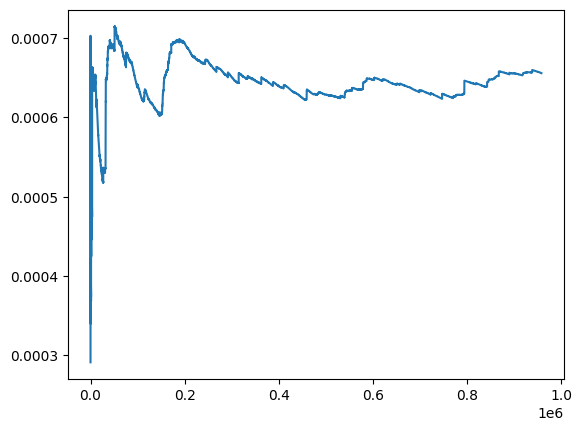

In [480]:
plt.plot(ibm_df["cum_vol"])

In [491]:
last_minute_of_each_day = ibm_df.groupby(ibm_df['Date Time'].dt.date).last()

In [450]:
from math import sqrt

# Data Insights

In [166]:
ibm_df.iloc[794919:794923]

,Date Time,Open,High,Low,Close,Volume,Date,Time,Log_Returns,volaility,volatility
794921,2018-04-18 12:10:00,117.9897,118.0921,117.9579,118.0016,35686.0,2018-04-18,12:10:00,0.000370,0.000370,1.369669e-07
794922,2018-04-18 12:11:00,118.0016,127.7209,117.9897,127.7209,21200.0,2018-04-18,12:11:00,0.079149,0.079149,6.264551e-03
794923,2018-04-18 12:12:00,118.0413,118.0611,118.0055,118.0325,13916.0,2018-04-18,12:12:00,-0.078887,-0.078888,6.223272e-03
794924,2018-04-18 12:13:00,118.0254,118.0611,118.0214,118.0373,12823.0,2018-04-18,12:13:00,0.000041,0.000040,1.628428e-09


In [500]:
ibm_df["Log_Returns"].nlargest(20)

867157    0.080164
794161    0.079149
746761    0.076530
291847    0.048386
586360    0.042518
818389    0.035161
243460    0.034949
32386     0.031170
770002    0.028511
147067    0.027408
195835    0.026553
657226    0.023944
154306    0.023355
926593    0.022548
540640    0.022260
191263    0.022031
182119    0.021910
156211    0.021788
792481    0.021103
99442     0.021084
Name: Log_Returns, dtype: float64

In [180]:
q_low = jnj_df["Log_Returns"].quantile(0.01)
q_hi  = jnj_df["Log_Returns"].quantile(0.99)

In [181]:
df_filtered = jnj_df[(jnj_df["Log_Returns"] < q_hi) & (jnj_df["Log_Returns"] > q_low)]

(array([  7748.,  17736.,  45394., 115551., 332087., 233255., 116581.,
         45171.,  17995.,   7905.]),
 array([-1.18405736e-03, -9.47071597e-04, -7.10085832e-04, -4.73100066e-04,
        -2.36114300e-04,  8.71465774e-07,  2.37857232e-04,  4.74842997e-04,
         7.11828763e-04,  9.48814529e-04,  1.18580029e-03]),
 <BarContainer object of 10 artists>)

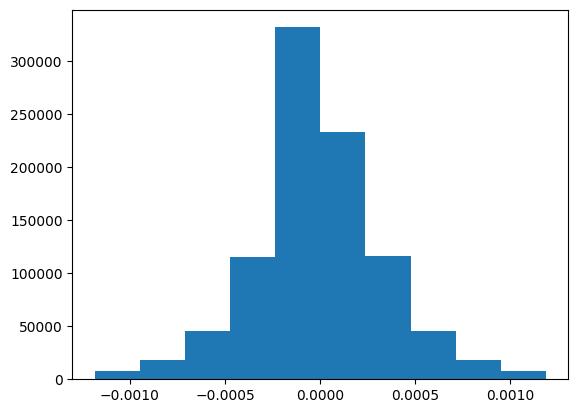

In [184]:
plt.hist(df_filtered["Log_Returns"])

In [178]:
jnj_df["Log_Returns"].nsmallest(20)

540639   -0.102017
858393   -0.040737
858774   -0.029305
913005   -0.029194
776051   -0.027473
483489   -0.026836
32694    -0.025722
160782   -0.025706
698754   -0.024800
51816    -0.024458
101727   -0.022819
575310   -0.021826
867537   -0.021670
676656   -0.021036
176022   -0.020850
913638   -0.020522
939165   -0.020233
542925   -0.019594
76200    -0.019038
162306   -0.018779
Name: Log_Returns, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x357c875e0>,
 'caps': [<matplotlib.lines.Line2D at 0x357c87b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x357c87340>],
 'medians': [<matplotlib.lines.Line2D at 0x357c960a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x357c62b20>],
 'means': []}

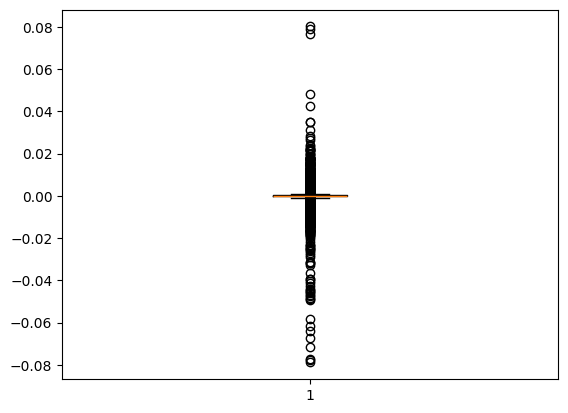

In [158]:
plt.boxplot(ibm_df["Log_Returns"])

(array([6.00000e+00, 6.00000e+00, 1.50000e+01, 3.70000e+01, 8.98795e+05,
        5.96980e+04, 3.10000e+01, 3.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([-0.0788874 , -0.06298231, -0.04707722, -0.03117213, -0.01526703,
         0.00063806,  0.01654315,  0.03244825,  0.04835334,  0.06425843,
         0.08016352]),
 <BarContainer object of 10 artists>)

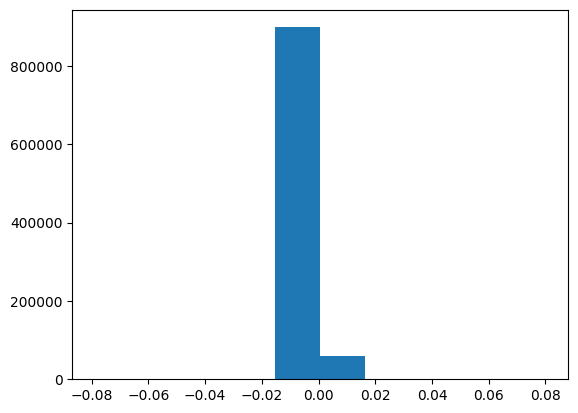

In [143]:
plt.hist(ibm_df["Log_Returns"], bins=10)

In [187]:
daily_log_returns_large = ibm_df.resample('D', on='Date Time').sum()["Log_Returns"]

# Creating image

In [247]:
50*50

2500

In [271]:
ibm_daily_volatility_diff = ibm_daily_volatility.diff().dropna()

In [230]:
mm_scaler_x = MinMaxScaler(feature_range=(-255,255))

In [282]:
pre_scale = np.reshape(ibm_daily_volatility_diff, (-1,1))

In [283]:
pre_scale.shape

(2514, 1)

In [287]:
scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

In [496]:
daily_volatility_diff = last_minute_of_each_day["cum_vol"].diff().dropna()

pre_scale = np.reshape(daily_volatility_diff, (-1,1))
    
mm_scaler_x = MinMaxScaler(feature_range=(-255,255))
scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

In [498]:
scaled_daily_vol_dif.shape

(2513, 1)

In [499]:
diff_to_rgb(scaled_daily_vol_dif).shape

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


(50, 50, 3)

In [406]:
def create_full_image(stock_data):

    df = stock_data
    
    observations_per_day = df.groupby(df['Date Time'].dt.date).size()
    trading_hours = observations_per_day.unique()[0]

    log_return_mean = df["Log_Returns"].mean()
    df["mean_deviation"] = df["Log_Returns"].apply(lambda x: (x - log_return_mean)**2)

    daily_volatility = (df.groupby(df['Date Time'].dt.date)["mean_deviation"].sum()/trading_hours)**0.5

    
    daily_volatility_diff = daily_volatility.diff().dropna()

    pre_scale = np.reshape(daily_volatility_diff, (-1,1))
    
    mm_scaler_x = MinMaxScaler(feature_range=(-255,255))
    scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

    return diff_to_rgb(scaled_daily_vol_dif)
    

In [412]:
tmp = create_full_image(jnj_df)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


In [413]:
tmpp = create_full_image(wmt_df)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


In [131]:
def diff_to_rgb(scaled_daily_vol_dif):

    size = scaled_daily_vol_dif.shape[0]
    
    red = np.zeros(size)
    green = np.zeros(size)
    blue = np.zeros(size)
    
    for i in range(len(scaled_daily_vol_dif)):
        if scaled_daily_vol_dif[i] < 0:
            red[i] = np.abs(scaled_daily_vol_dif[i])
        elif scaled_daily_vol_dif[i] > 0:
            green[i] = scaled_daily_vol_dif[i]
        elif scaled_daily_vol_dif[i] == 0:
            continue
        else:
            print(error)

    image_dim = math.floor(scaled_daily_vol_dif.shape[0]**0.5)

    flat_image = np.column_stack((red, green, blue))

    square_image = flat_image[:image_dim**2].reshape((image_dim, image_dim, 3))
    return square_image

In [320]:
tmp.shape

(958215, 11)

In [294]:
reshaped_arr = testing[:50**2].reshape((50, 50, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


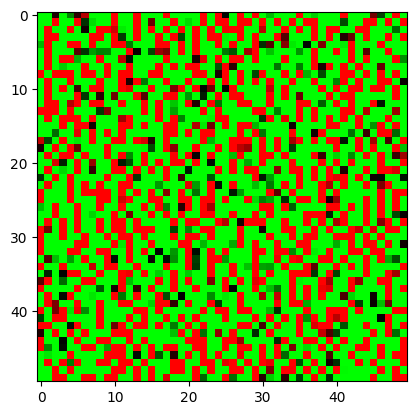

In [421]:
plt.imshow(tmppp)

In [502]:
2515/5/4

125.75

In [504]:
380*22

8360

1. 5 Minuten
2. x Achse Minuten, y Achse Tage im Monat
3. rolling window

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


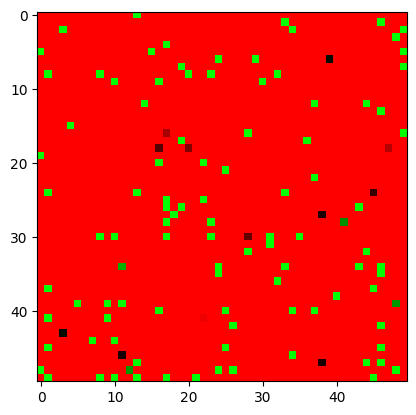

In [417]:
plt.imshow(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


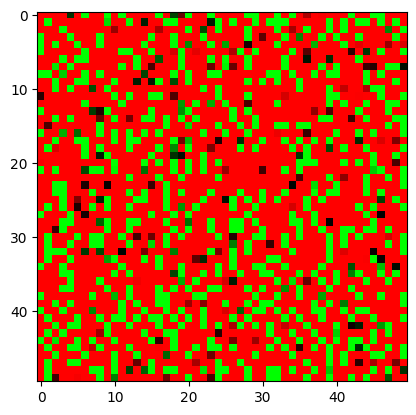

In [415]:
plt.imshow(tmpp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


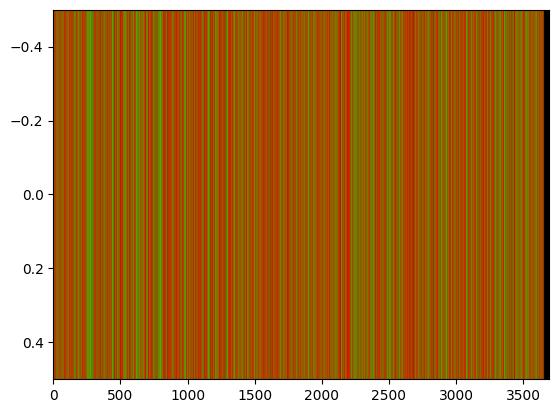

In [22]:
plt.imshow(np.array([testing]), aspect = "auto")

In [23]:
!mkdir "raw_data/images"

In [92]:
tmp = reshaped_arr.astype(np.uint8)

In [89]:
normalized_arr = np.clip(reshaped_arr, 0, 1)

In [96]:
uint8_arr = (normalized_arr * 255).astype(np.uint8)

plt.imsave("raw_data/images/test4.png", uint8_arr)

In [ ]:
reshape

In [95]:
plt.imsave("raw_data/images/test3.png", tmp)

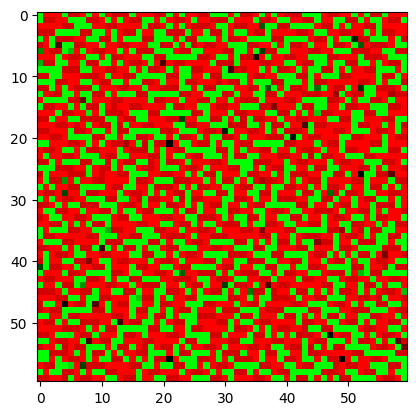

In [98]:
image_data = plt.imread("raw_data/images/test4.png")

# Display the image
plt.imshow(image_data)

In [178]:
np.array([[[255,0,0], [0,255,0], [0,0,255]]]).shape

(1, 3, 3)

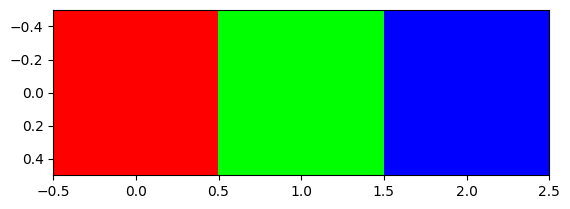

In [167]:
plt.imshow(np.array([[[255,0,0], [0,255,0], [0,0,255]]]))

In [ ]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])

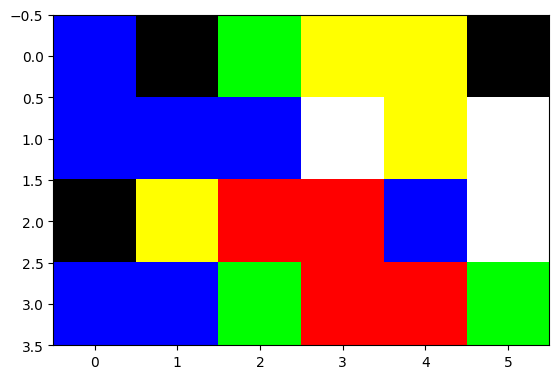

In [38]:
palette = np.array([[255,   0,   0], # index 0: red
                   [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0], # index 5: yellow
                     ], dtype=np.uint8)
     

m, n = 4, 6

indices = np.random.randint(0, len(palette), size=(4, 6))
indices
np.array([[2, 4, 0, 1, 4, 2],
       [1, 1, 5, 5, 2, 0],
       [4, 4, 3, 3, 0, 4],
       [2, 5, 0, 5, 2, 3]])

In [21]: plt.imshow(palette[indices])

In [138]:
palette[indices]

array([[[  0,   0, 255],
        [255, 255,   0],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [  0,   0,   0],
        [255, 255,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)

## train_test_split

In [19]:
ibm_df.shape[0] * 0.7

670750.5

In [20]:
ibm_train_split = ibm_df.iloc[:670941]

In [21]:
ibm_train_split["forward_RV"] = ibm_train_split["realized_vol"].shift(1)

In [24]:
ibm_train_split = ibm_train_split[381:]

In [531]:
2515 * 0.7

1760.5

In [25]:
ibm_train_split

,Date Time,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol,forward_RV
381,2010-01-06 09:35:00,84.8775,84.9228,84.6767,84.6897,46663.0,2010-01-06,09:35:00,-0.000382,1.463062e-07,0.000209,0.014469,0.014463
382,2010-01-06 09:36:00,84.6962,84.8257,84.6897,84.7868,26449.0,2010-01-06,09:36:00,0.001146,1.313045e-06,0.000211,0.014514,0.014469
383,2010-01-06 09:37:00,84.7998,84.8580,84.7868,84.8127,15784.0,2010-01-06,09:37:00,0.000305,9.328469e-08,0.000211,0.014517,0.014514
384,2010-01-06 09:38:00,84.8127,84.8257,84.7156,84.7350,29916.0,2010-01-06,09:38:00,-0.000917,8.400754e-07,0.000212,0.014546,0.014517
385,2010-01-06 09:39:00,84.7544,84.7577,84.7156,84.7285,30572.0,2010-01-06,09:39:00,-0.000077,5.884836e-09,0.000212,0.014546,0.014546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670936,2016-12-30 15:51:00,125.5979,125.5979,125.5525,125.5600,15253.0,2016-12-30,15:51:00,-0.000332,1.102619e-07,0.274200,0.523641,0.523641
670937,2016-12-30 15:52:00,125.5600,125.5828,125.5525,125.5600,17724.0,2016-12-30,15:52:00,0.000000,0.000000e+00,0.274200,0.523641,0.523641
670938,2016-12-30 15:53:00,125.5600,125.5676,125.5373,125.5449,13706.0,2016-12-30,15:53:00,-0.000120,1.446450e-08,0.274200,0.523641,0.523641
670939,2016-12-30 15:54:00,125.5525,125.5828,125.4918,125.5070,33353.0,2016-12-30,15:54:00,-0.000302,9.116149e-08,0.274200,0.523641,0.523641


In [562]:
ibm_train_split.set_index('Date Time', inplace=True)

In [31]:
ibm_train_split_small = ibm_train_split[:381*35]

# Subsequences

In [ ]:
 def subsequence(df, length, start = 0):
        last_possible_start = len(df) - length
        X = df[start:start + length]
        y = df["poll"][(start + length ) : (start + length + 7)]

        return X, y

    # Creates a list of subsequences
    def multiple_subsequences(df, length):

        list_of_X = []
        list_of_y = []

        number_of_subsequences = round(len(df) /  7 - (length/7))
        print(number_of_subsequences)
        start = 0
        for num in range(number_of_subsequences):
            temporary_X, temporary_y = subsequence(df, length, start)
            list_of_X.append(temporary_X)
            list_of_y.append(temporary_y)
            start = start + 7

        return list_of_X, list_of_y

    # Creating subsequences of lenght specifided (28 / 7parties = 4 days)
    X_train , y_train = multiple_subsequences(pd.DataFrame(df_train_scaled), 21 )

    # Transforn to array to fit model
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    return X_train, y_train



In [581]:
a = np.array([[[380, 250, 0], [380, 250, 0],[380, 250, 0],[380, 250, 0],[380, 250, 0]]])
b = np.array([[[380, 250, 0], [380, 250, 0],[380, 250, 0],[380, 250, 0],[380, 250, 0]]])

In [582]:
b.shape

(1, 5, 3)

In [30]:
ibm_train_split.set_index("Date Time", drop=True, inplace=True)

In [36]:
ibm_train_split_small

,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol,forward_RV
Date Time,,,,,,,,,,,,
2010-01-06 09:35:00,84.8775,84.9228,84.6767,84.6897,46663.0,2010-01-06,09:35:00,-0.000382,1.463062e-07,0.000209,0.014469,0.014463
2010-01-06 09:36:00,84.6962,84.8257,84.6897,84.7868,26449.0,2010-01-06,09:36:00,0.001146,1.313045e-06,0.000211,0.014514,0.014469
2010-01-06 09:37:00,84.7998,84.8580,84.7868,84.8127,15784.0,2010-01-06,09:37:00,0.000305,9.328469e-08,0.000211,0.014517,0.014514
2010-01-06 09:38:00,84.8127,84.8257,84.7156,84.7350,29916.0,2010-01-06,09:38:00,-0.000917,8.400754e-07,0.000212,0.014546,0.014517
2010-01-06 09:39:00,84.7544,84.7577,84.7156,84.7285,30572.0,2010-01-06,09:39:00,-0.000077,5.884836e-09,0.000212,0.014546,0.014546
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-25 15:51:00,82.6133,82.6263,82.5873,82.6068,23428.0,2010-02-25,15:51:00,0.000000,0.000000e+00,0.005295,0.072764,0.072764
2010-02-25 15:52:00,82.6068,82.6068,82.5482,82.5873,40995.0,2010-02-25,15:52:00,-0.000236,5.573656e-08,0.005295,0.072765,0.072764
2010-02-25 15:53:00,82.5808,82.5873,82.5027,82.5157,29337.0,2010-02-25,15:53:00,-0.000867,7.522742e-07,0.005295,0.072770,0.072765


In [48]:
subsequences = []

# Iterate over each 30-day subsequence
for i in range(len(ibm_train_split_small) - 21 * 381 + 1):
    # Select the next 30 days of data
    subsequence = ibm_train_split_small.iloc[i:i + 21 * 381]

    # Check if the subsequence has 30 days of data
    if len(subsequence) == 21 * 381:  # Assuming 381 rows for each day
        subsequences.append(subsequence)

# Concatenate the subsequences into a single DataFrame
result = pd.concat(subsequences)

In [69]:
ibm_train_split_small.shape

(13335, 12)

In [78]:
ibm_train_split_small_2 = ibm_train_split_small[["realized_vol", "forward_RV"]]

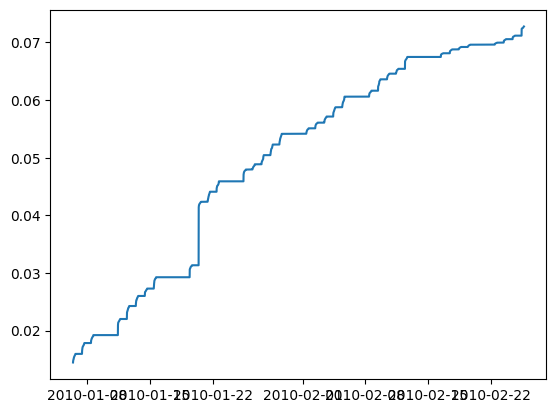

In [138]:
plt.plot(ibm_train_split_small_2["forward_RV"])

In [114]:
subsequences = []

for i in range(int(len(ibm_train_split_small_2)/381-20)):
    subsequence = ibm_train_split_small_2.iloc[i * 381: (21 + i) * 381]

    subsequences.append(subsequence)

(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)
(8001, 2)


In [140]:
len(subsequences)

15

In [ ]:
subsequences[0]

In [143]:
len(subsequences[0])/381

21.0

In [199]:
a = np.array([[230, 102, 0], [230, 102, 0],[230, 102, 0],[230, 102, 0],[230, 102, 0]])
b = np.array([[230, 102, 0], [230, 102, 0],[230, 102, 0],[230, 102, 0],[230, 102, 0]])

In [193]:
a.shape

(5, 3)

In [200]:
tmp = np.append(a,b)

In [202]:
np.reshape(tmp, (2,5,3))

array([[[230, 102,   0],
        [230, 102,   0],
        [230, 102,   0],
        [230, 102,   0],
        [230, 102,   0]],

       [[230, 102,   0],
        [230, 102,   0],
        [230, 102,   0],
        [230, 102,   0],
        [230, 102,   0]]])

In [183]:
c = np.stack([a,b])

ValueError: all input arrays must have the same shape

In [186]:
c.shape

(2, 5, 3)

In [187]:
c = np.stack([c, b])

ValueError: all input arrays must have the same shape

In [156]:
u = np.zer()

TypeError: array() missing required argument 'object' (pos 0)

In [207]:
tmp = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

In [208]:
tmp.shape

(12,)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [229]:
def image_from_subsequence(sequence, sequence_index):

    image = sequence[sequence_index].iloc[:381]["realized_vol"]

    for i in range(1,int(len(subsequences[0])/381)-1):
        
        tmp_array = np.array([sequence[sequence_index].iloc[i*381:381*(1+i)]["realized_vol"]])
        
        image = np.append(image, tmp_array)
        

    image = np.reshape(image, [20,381])
    
    return image

In [230]:
tmp_image = image_from_subsequence(subsequences, 0)

In [231]:
tmp_image.shape

(20, 381)

In [264]:
image_list = []
for n in range(3):
    
    image = image_from_subsequence(subsequences, n)
    
    image_list.append(image)

In [127]:
pre_scale = np.reshape(tmp, (-1,1))
    
mm_scaler_x = MinMaxScaler(feature_range=(-255,255))
scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

In [128]:
scaled_daily_vol_dif

array([[-255.        ],
       [-239.47228899],
       [-238.3709733 ],
       [-228.46403406],
       [-228.39470412],
       [-227.77697167],
       [-223.37139417],
       [-212.62501547],
       [-207.66433551],
       [-207.38756088],
       [-201.84809215],
       [-200.75286831],
       [-200.48125133],
       [-200.41228735],
       [-200.13641978],
       [-198.42357345],
       [-188.90537725],
       [-186.6138798 ],
       [-181.08591702],
       [-180.65954836],
       [-179.82256053],
       [-179.82256053],
       [-179.3965271 ],
       [-179.24384101],
       [-178.63335248],
       [-177.54600486],
       [-176.45955543],
       [-169.67132503],
       [-169.60311633],
       [-161.43188013],
       [-160.82641264],
       [-158.39444241],
       [-157.56715542],
       [-157.5507217 ],
       [-157.48292483],
       [-156.87270073],
       [-149.47218242],
       [-147.42581731],
       [-145.74994941],
       [-137.61835259],
       [-137.35190851],
       [-124.213

In [133]:
import math

In [134]:
x = diff_to_rgb(scaled_daily_vol_dif)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_72334/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_72334/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


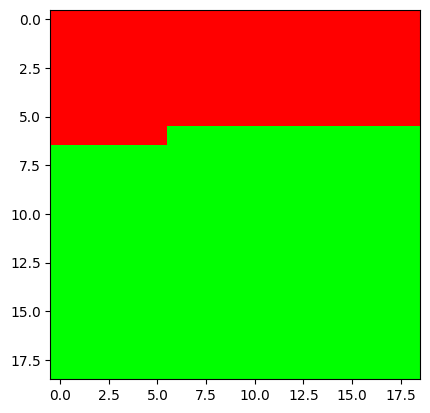

In [135]:
plt.imshow(x)

In [103]:
21+14

35

In [98]:
subsequences[29]

,realized_vol,forward_RV
Date Time,,
2010-02-18 09:35:00,0.068804,0.068795
2010-02-18 09:36:00,0.068832,0.068804
2010-02-18 09:37:00,0.068833,0.068832
2010-02-18 09:38:00,0.068835,0.068833
2010-02-18 09:39:00,0.068843,0.068835
...,...,...
2010-02-25 15:51:00,0.072764,0.072764
2010-02-25 15:52:00,0.072765,0.072764
2010-02-25 15:53:00,0.072770,0.072765


In [101]:
ibm_train_split_small.iloc[2*381:23*381]

,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol,forward_RV
Date Time,,,,,,,,,,,,
2010-01-08 09:35:00,83.9968,84.0098,83.9321,83.9645,14824.0,2010-01-08,09:35:00,0.001467,2.152592e-06,0.000320,0.017896,0.017836
2010-01-08 09:36:00,83.9774,83.9806,83.8932,83.9263,25485.0,2010-01-08,09:36:00,-0.000455,2.070775e-07,0.000320,0.017902,0.017896
2010-01-08 09:37:00,83.9127,83.9321,83.8544,83.8544,11525.0,2010-01-08,09:37:00,-0.000857,7.345711e-07,0.000321,0.017922,0.017902
2010-01-08 09:38:00,83.8544,83.8932,83.7961,83.8220,18192.0,2010-01-08,09:38:00,-0.000386,1.493503e-07,0.000321,0.017926,0.017922
2010-01-08 09:39:00,83.8155,83.8285,83.5824,83.6731,46130.0,2010-01-08,09:39:00,-0.001778,3.161152e-06,0.000325,0.018014,0.017926
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-08 15:51:00,79.4333,79.4398,79.3423,79.4333,36702.0,2010-02-08,15:51:00,0.000082,6.696641e-09,0.003796,0.061610,0.061610
2010-02-08 15:52:00,79.4268,79.5049,79.4268,79.4854,28598.0,2010-02-08,15:52:00,0.000656,4.299178e-07,0.003796,0.061613,0.061610
2010-02-08 15:53:00,79.4984,79.4984,79.4333,79.4333,18351.0,2010-02-08,15:53:00,-0.000656,4.299178e-07,0.003797,0.061617,0.061613


In [100]:
ibm_train_split_small.iloc[381:22*381]

,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol,forward_RV
Date Time,,,,,,,,,,,,
2010-01-07 09:35:00,83.9515,84.0163,83.9327,84.0130,16370.0,2010-01-07,09:35:00,-0.002271,5.156884e-06,0.000260,0.016117,0.015957
2010-01-07 09:36:00,84.0163,84.1134,84.0033,84.0033,23915.0,2010-01-07,09:36:00,-0.000115,1.333216e-08,0.000260,0.016118,0.016117
2010-01-07 09:37:00,83.9968,84.0227,83.9127,83.9774,23436.0,2010-01-07,09:37:00,-0.000308,9.509129e-08,0.000260,0.016121,0.016118
2010-01-07 09:38:00,83.9839,84.0163,83.8997,83.9217,13352.0,2010-01-07,09:38:00,-0.000663,4.402240e-07,0.000260,0.016134,0.016121
2010-01-07 09:39:00,83.9256,83.9904,83.9256,83.9904,10831.0,2010-01-07,09:39:00,0.000818,6.695909e-07,0.000261,0.016155,0.016134
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-05 15:51:00,79.6390,79.7426,79.6196,79.6973,33209.0,2010-02-05,15:51:00,0.000895,8.010885e-07,0.003671,0.060587,0.060580
2010-02-05 15:52:00,79.6973,79.8074,79.6973,79.7685,37363.0,2010-02-05,15:52:00,0.000893,7.974160e-07,0.003672,0.060593,0.060587
2010-02-05 15:53:00,79.7555,79.7620,79.6843,79.7555,24241.0,2010-02-05,15:53:00,-0.000163,2.656407e-08,0.003672,0.060593,0.060593


In [99]:
ibm_train_split_small.iloc[0:21*381]

,Open,High,Low,Close,Volume,Date,Time,Log_Returns,log_return_squared,realized_var,realized_vol,forward_RV
Date Time,,,,,,,,,,,,
2010-01-06 09:35:00,84.8775,84.9228,84.6767,84.6897,46663.0,2010-01-06,09:35:00,-0.000382,1.463062e-07,0.000209,0.014469,0.014463
2010-01-06 09:36:00,84.6962,84.8257,84.6897,84.7868,26449.0,2010-01-06,09:36:00,0.001146,1.313045e-06,0.000211,0.014514,0.014469
2010-01-06 09:37:00,84.7998,84.8580,84.7868,84.8127,15784.0,2010-01-06,09:37:00,0.000305,9.328469e-08,0.000211,0.014517,0.014514
2010-01-06 09:38:00,84.8127,84.8257,84.7156,84.7350,29916.0,2010-01-06,09:38:00,-0.000917,8.400754e-07,0.000212,0.014546,0.014517
2010-01-06 09:39:00,84.7544,84.7577,84.7156,84.7285,30572.0,2010-01-06,09:39:00,-0.000077,5.884836e-09,0.000212,0.014546,0.014546
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-04 15:51:00,79.7491,79.7685,79.7361,79.7491,22027.0,2010-02-04,15:51:00,-0.000080,6.439817e-09,0.003452,0.058750,0.058750
2010-02-04 15:52:00,79.7426,79.7620,79.7296,79.7426,38204.0,2010-02-04,15:52:00,-0.000082,6.643708e-09,0.003452,0.058750,0.058750
2010-02-04 15:53:00,79.7361,79.7620,79.7296,79.7555,46036.0,2010-02-04,15:53:00,0.000162,2.616546e-08,0.003452,0.058750,0.058750


In [67]:
8001/381

21.0

In [47]:
result

NameError: name 'result' is not defined

In [41]:
%%timeit

for i in range(10000):
    i+1

221 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [1]:
ibm_train_split

NameError: name 'ibm_train_split' is not defined